# Integrated Project

## Games Dataset Analysis <a class="anchor" id="chapter1"></a>

1. **Project Description**<br>
    
    We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.<br> 
    Our goal is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
    In front of us there is data that going back to 2016. Let’s imagine that it’s December 2016 and we planning a campaign for 2017.<br>
    The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.<br>
    In the project we will do those steps to understand our data:
    * Read the dataset and check his general information before we start
    * Data Preprocessing - Prepare the dataset to the analysis by filling his missing values, convert the types of the columns and fix mistakes.
    * Analyze the data - check how some atributes influence other, Get insights about our data and try to predict the future from the past.
    * Create a user profile for each region - for each region we will check what is popular and we will check the differnces between them.
    * Test 2 hypotheses
    


2. **Data description**
* Name (of the game)
* Platform
* Year_of_Release
* Genre
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)

 Link to the dataset: [games.csv](https://code.s3.yandex.net/datasets/games.csv)

## Open the data file and study his general information 

In [46]:
# Import packages:

import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

In [47]:
# Read the csv file:
games_data = pd.read_csv('games.csv') 

# Check dataset info:
games_data.info()

# Check the missing data propotion:
print('Check missing values:\n') 
report = games_data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games_data.shape[0]).round(4)*100
report.sort_values(by = 'missing_values', ascending = False,inplace =True)
print(report,'\n')

# Check duplicates:
if games_data.duplicated().sum() != 0:
    print("The dataframe have duplicated rows.\n")
else:
    print("The dataframe don't have duplicated rows.\n")


# Display the game_data dataframe
display(games_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Check missing values:

                 missing_values  % of total
Critic_Score               8578       51.32
Rating                     6766       40.48
User_Score                 6701       40.09
Year_of_Release             269        1.6

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Conclusion 

In this chapter we done the following steps:
1. *Read the dataset* - Open the games.csv file and save in a local variable. 
2. *Check missing values propotion* - For each column we have checked the percentage of the missing values in data. the
   columns with missing values are:
   * Critic_Score - 8578 missing values that are 51.32% of the column data(high precentage of missing values).
   * Rating - 6766 missing values that are 40.48% of the column data(high precentage of missing values).
   * User_Score - 6701 missing values that are 40.09% of the column data(high precentage of missing values).
   * Year_of_Release - 269 missing values that are 1.61% of the column data(really small precentage of missing values).
   * Name - 2 missing values that are 0.01% of the column data(really small precentage of missing values).
   * Genre - 2 missing values that are 0.01% of the column data(really small precentage of missing values).
   
3. *Check for duplicated rows* - We have checked if our dataset have duplicates rows. The result - No duplicated rows.
4. *Display the table*

## Data Processing

### Fill the columns which contain missing values

In [48]:
# Functions for the missing values handling:
def set_user_score(data):
    '''Calculate the user_score missing values with this formulas:
       1. user_score = 0.5* (critic_score/10) + formula 2(a=b=c=0.25), use when critic_score!=null 
       2. user_score = a * (median based platform)  + c * (median based rating), a=c=0.5
           and the medians are different than null
       data indexes:
       0.Name              1.Platform          2.Year_of_Release   
       3.Genre             4.NA_sales          5.EU_sales   
       6.JP_sales          7.Other_sales       8.Critic_Score
                9.User_Score            10.Rating     
    '''
    # convert tbd to nan:
    if data[9]=='tbd':
        return math.nan
    
    # if theres a valid user_score return it.
    if data[9]==data[9]:
        return data[9]
    
    # calculate averages:
    median_based_platform = user_median_by_platform[data[1]]
    median_based_rating = user_median_by_rating[data[10]]
    # check that the averges are not nan if they are they not influence
    l = []
    if median_based_platform == median_based_platform:
        l.append(median_based_platform)
    if median_based_rating == median_based_rating:
        l.append(median_based_rating)
    res=0
    average_influence = 1
    if data[8]==data[8]:
        if len(l)==2:
            res = 0.5* float(data[8])/10  
            average_influence = 0.25
        elif len(l)==1:   
            res = 0.6* float(data[8])/10  
            average_influence = 0.4
        else:
            return data[8]
    
    elif len(l)>0:
        average_influence = average_influence/len(l)
    
    # calculate result
    for i in l:
        res+= average_influence * i
    return res



def set_critic_score(data):
    '''Calculate an estimation of the critic_score missing values with this formulas:
       1. critic_score = 0.4* (user_score*10) + formula 2(a=b=c=0.2), use when user_score != null 
       2. critic_score = a * (median based platform) + b * (median based genre) + c * (median based rating), a=c=b=0.333333
           and the medians are different than null
       data indexes:
       0.Name              1.Platform          2.Year_of_Release   
       3.Genre             4.NA_sales          5.EU_sales   
       6.JP_sales          7.Other_sales       8.Critic_Score
                9.User_Score            10.Rating     
    '''
    # if theres a valid critic_score return it.
    if data[8]==data[8]:
        return data[8]
    
    # calculate averages:
    median_based_platform = critic_median_by_platform[data[1]]
    median_based_rating = critic_median_by_rating[data[10]]
    # check that the averges are not nan if they are they not influence
    l = []
    if median_based_platform == median_based_platform:
        l.append(median_based_platform)
    if median_based_rating == median_based_rating:
        l.append(median_based_rating)
    
    res=0
    average_influence = 1
    
    if data[9]==data[9]:
        if len(l)==2:
            res = 0.5* float(data[9])*10  
            average_influence = 0.25
        elif len(l)==1:   
            res = 0.6* float(data[9])*10
            average_influence = 0.4
        else:
            return float(data[9])
    
    elif len(l)>0:
        average_influence = average_influence/len(l)
    
    # calculate result
    for i in l:
        res+= average_influence * i
    return res


In [49]:
# Cast the columns name to lowercase
games_data= games_data.rename(columns=str.lower)

# we have checked the columns with the missing values:

# 1. Check the comptability between the missing values in the 'Name' column and in the 'genre'
#    column. because both of them have exactly 2 missing values. 
print('The rows with missing values at the Name and Genre columns') 
display(games_data.loc[(games_data['name'].isnull())&(games_data['genre'].isnull())])

# As we suspect the 2 missing values are comptabile, we don't have enough information to fill them.
# so we will drop this two rows for give us the posbility to relly on this 2 columns to fill other missing values
to_drop = games_data.loc[(games_data['name'].isnull())&(games_data['genre'].isnull())].index
games_data.drop(to_drop,inplace=True)

The rows with missing values at the Name and Genre columns


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [50]:
# 2. Fill the missing values in the 'Rating' column
print(games_data['rating'].unique())
print(games_data['rating'].value_counts())

# We see from our print that the values EC,RP,K-A,AO appear really a few times. maybe
# the reason that we had so much missing values there was error with those types 

# Try to fill the missing values with EC,RP,K-A,AO values
un_shown_rating = ['EC','RP','K-A','AO']
rating_filtered_table = games_data.query('rating in @un_shown_rating')

# We see that all the kind of rating is exsisting in our column. so we will fill the missing values with 
# the most frequent value according to the game genre and his platform in the filtered table.
filtered_unique_genres = rating_filtered_table['genre'].unique()
unique_platforms = rating_filtered_table['platform'].unique()

for platform in unique_platforms:
    for genre in filtered_unique_genres:
        try:
            table = rating_filtered_table.query('platform == @platform and Genre == @genre')
            if not table.empty:
                most_popular_rating = table['rating'].value_counts().idxmax()
                if most_popular_rating != 'NaN':
                    games_data.loc[(games_data['genre']==genre) & (games_data['platform']==platform) & (games_data['rating'].isnull()),'rating'] = most_popular_rating
        except:
            # No such a table - no such rows that have both those specific Genre and Platform 
            pass

# for the remaining missing values we will fill them to the most frequent rating according to the game genre in filtered table
for genre in filtered_unique_genres:
    table = rating_filtered_table.query('genre == @genre')
    if not table.empty:
        most_popular_rating = table['rating'].value_counts().idxmax()
        # give some preference to 'AO' category that apears only once.
        if 'AO' in table['rating'].unique():
            most_popular_rating = 'AO'        
        if most_popular_rating != 'nan':
            games_data.loc[(games_data['genre']==genre) & (games_data['rating'].isnull()),'rating'] = most_popular_rating

# After we tried to fill acording to the values that appears less times let do the same with other values:(for sure we didnt fill all)
# filled all the missing values) We see that all the kind of rating is exsisting in our column. so we will fill the missing values with 
# the most frequent value according to the game genre and his platform.
unique_genres = games_data['genre'].unique()
unique_platforms = games_data['platform'].unique()
for platform in unique_platforms:
    for genre in unique_genres:
        try:
            table = games_data.query('platform == @platform and Genre == @genre')
            if not table.empty:
                most_popular_rating = table['rating'].value_counts().idxmax()
                if most_popular_rating != 'NaN':
                    games_data.loc[(games_data['genre']==genre) & (games_data['platform']==platform) & (games_data['rating'].isnull()),'rating'] = most_popular_rating
        except:
            # No such a table - no such rows that have both those specific Genre and Platform 
            pass

# for the remaining missing values we will fill them to the most frequent rating according to the game genre
for genre in unique_genres:
    table = games_data.query('genre == @genre')
    if not table.empty:
        most_popular_rating = table['rating'].value_counts().idxmax()
        if most_popular_rating != 'NaN':
            games_data.loc[(games_data['genre']==genre) & (games_data['rating'].isnull()),'rating'] = most_popular_rating

# See values distribution again after the process:
print('\n'+'Rating column values distribution after the the filling process:\n')
print(games_data['rating'].value_counts())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Rating column values distribution after the the filling process:

E       5691
T       4093
M       1867
EC      1733
E10+    1420
AO      1182
RP       724
K-A        3
Name: rating, dtype: int64


In [51]:
# 3. check the missing values in the Year_of_Release column
# check the unique values in the Year_of_Release column
unique_release_years = sorted(games_data['year_of_release'].unique())
print('\n'+'check unique years of release:\n',unique_release_years)
games_data['year_of_release'].fillna(0,inplace=True)
# All the years appears in the data. we don't have data that we can fill those columns(the data we have don't influence the release year). 


check unique years of release:
 [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


In [52]:
# 4. Fill the missing values in user_score column:
sorted_by_score = games_data.query('user_score != "tbd" and ~(user_score.isnull())').sort_values(by='user_score',ascending=False)
print('check the 15 rows with the best user_score:')
display(sorted_by_score.head(15))

# from a quick view we saw that the  rating, the platform, and the genre influence the user_score column 
# check correlation between the critic_score to user_score 
filtered_score = games_data.query('~(critic_score.isnull()) and ~(user_score.isnull()) and user_score!="tbd"').copy()
filtered_score['user_score'] = pd.to_numeric((filtered_score['user_score']), downcast ='integer')
print('\n'+'Correlation between critic_score to user_score:',filtered_score['user_score'].corr(filtered_score['critic_score']))
print('\n'+'Correlation between na_sales to user_score:',filtered_score['user_score'].corr(filtered_score['na_sales']))
print('\n'+'Correlation between eu_sales to user_score:',filtered_score['user_score'].corr(filtered_score['eu_sales']))
print('\n'+'Correlation between other_sales to user_score:',filtered_score['user_score'].corr(filtered_score['other_sales']))

restricted_filtered_score = games_data.query('user_score!="tbd"').copy()
restricted_filtered_score['user_score'] = pd.to_numeric((restricted_filtered_score['user_score']), downcast ='integer')

# calculate user_score median according to the rating and platform ,save results in dict
unique_ratings = games_data['rating'].unique()

user_median_by_platform = {}
for platform in unique_platforms:
    user_median_by_platform[platform] = filtered_score[filtered_score['platform']==platform]['user_score'].median() 

user_median_by_rating = {}
for rating in unique_ratings:
    user_median_by_rating[rating] = filtered_score[filtered_score['rating']==rating]['user_score'].median() 

# fill the missing values:    
games_data['user_score'] = games_data.apply(set_user_score,axis=1)



check the 15 rows with the best user_score:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14412,Breath of Fire III,PSP,2005.0,Role-Playing,0.00,0.02,0.00,0.01,NaN,9.7,T
8975,Boktai: The Sun is in Your Hand,GBA,2003.0,Role-Playing,0.10,0.04,0.00,0.00,83.0,9.6,E
3417,Harvest Moon: Friends of Mineral Town,GBA,2003.0,Simulation,0.34,0.13,0.11,0.01,81.0,9.6,E
16546,Wade Hixton's Counter Punch,GBA,2004.0,Sports,0.01,0.00,0.00,0.00,78.0,9.5,T
16627,Karnaaj Rally,GBA,2003.0,Racing,0.01,0.00,0.00,0.00,81.0,9.5,E
10105,Cory in the House,DS,2007.0,Action,0.10,0.00,0.00,0.01,NaN,9.5,E
11119,Super Puzzle Fighter II,GBA,0.0,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
1645,Golden Sun: The Lost Age,GBA,2002.0,Role-Playing,0.61,0.27,0.27,0.07,86.0,9.5,E
5920,MLB SlugFest Loaded,PS2,2004.0,Sports,0.14,0.11,0.00,0.04,77.0,9.5,T
1068,Resident Evil 4,GC,2005.0,Action,0.98,0.42,0.22,0.06,96.0,9.4,M



Correlation between critic_score to user_score: 0.5808778320767239

Correlation between na_sales to user_score: 0.08649591810429094

Correlation between eu_sales to user_score: 0.05557319125342916

Correlation between other_sales to user_score: 0.057359296891873746


In [53]:
# 5. Fill the missing values in critic_score column:
sorted_by_critic = games_data.query('~critic_score.isnull()').sort_values(by='critic_score',ascending=False)
print('check the 15 rows with the best critic_score:')
display(sorted_by_critic.head(15))


# calculate critic_score median according to the rating, platform and genre, ave results in dict
critic_median_by_platform = {}
critic_median_by_rating = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for platform in unique_platforms:
        critic_median_by_platform[platform] = games_data[games_data['platform']==platform]['critic_score'].median() 
        
    for rating in unique_ratings:
        critic_median_by_rating[rating] = games_data[games_data['rating']==rating]['critic_score'].median() 
        
# fill the missing values:
games_data['critic_score'] = games_data.apply(set_critic_score,axis=1)

check the 15 rows with the best critic_score:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
5350,SoulCalibur,DC,1999.0,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
1877,NFL 2K1,DC,2000.0,Sports,1.02,0.05,0.00,0.02,97.0,6,E
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
129,Halo: Combat Evolved,XB,2001.0,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M
49,Super Mario Galaxy,Wii,2007.0,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E


In [54]:
# check if we filled the missing values:
print('\n'+'Check the table info and display it')
games_data.info()
display(games_data.head())


Check the table info and display it
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       14289 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,73.0,7.500000,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.600000,T


**Conclusion - missing values** 

The stage of the missing values was long because of the big amount of the missing values and the complexity to calculate a decent estimation for the missing values.
As a first step we cast the the columns to lowercase.
after that we handle the missing values in this way:
1. *Name and genre columns*  
    
    we checked the comptability between the missing values in the 'Name' column and in the 'genre' column. <br>because both of them have exactly 2 missing values. And we suspect the missing values in the both columns in those 2 rows are comptable and those rows have a lot of missing values(we don't have data to work with to estimate those missing values). because 2 rows are 0.01% of data we will drop them.
    
2. *rating column* <br><br>As first step we checked the values in the rating column(ESRB rating) and we saw that 4 types of apears much less: EC, RP, K-A, AO.<br>So we have tried to find the combination of the platform and genre that give us those ratings - we created a filtered df that include only the combination that gives us those rating and work with this table to give priority to those values and we give a big priority to 'AO' rating because if there a combination of genre with this rating can point that this genre include things that are not approprate to kids/teens like violence and etc...<br><br>
    After that with remaining missing values we fill them the missing values with the most frequent value according to the game genre and his platform and after according only to the genre. after this process we haved increase the ratings that wasn't frequent and filled all the missing values in the column. we supose that the missing values are because converstion errors/human error with the specific ESRB ratings we have shown before.
    
3. *Year_of_Release column*

    As a first step we checked the unique values in the Year_of_Release column. we have see that all the years appears so is not a error with specific year is more like that human error(when they insert the data they forget to add the year of release). we don't have data that we can estimate those values and the missing values are a really small part of data(1.61%). so we will just fill the missing values with zero.
    
4. *user_score column*

    As a first step we check the 15 rows that have the best user_score. we saw that the columns genre,platform and rating have a high influence on the result. and we have also checked the correlation between the critic_score column to our column and it result enough high(0.58) to take this column in consideration to aproximate the user_score missing values.
    <br>
    To fill the missing in the column we will use a equation to aproximate the missing values. lets define:
    <br> 
     $\mu_p$ - The median of user_score according to his platform.<br>
     $\mu_r$ - The median of user_score according to his rating.<br>
     $C$ - The critic_score in the same row of the missing value divided by 10. <br>
     We use the following equation when $C \neq null$:<br>
     $value = \alpha×C + \beta×\mu_p + \delta×\mu_r $<br> 
     when: $0 \leq \alpha,\beta,\delta \leq 1$<br>
     We decide the value of $\alpha,\beta,\delta$ in this way - <br>
     when all the madians are different than NaN:  $\alpha = 0.5,\beta= 0.25,\delta= 0.25$<br> 
     when the 1 median is equal to null we set his coefficient to zero and set the last median coefficient to $\epsilon$ when: $\alpha=0.6, \epsilon=0.4$<br>
     if all of them are null we take only $C$ so we will set: $\alpha = 1, \gamma= \delta= 0$<br> 
    
     if the value of the critic_score is null we will use another equation:<br>
     $value = \alpha × \mu_p + \gamma × \mu_r$<br>
     The definition of $\alpha, \gamma$ is similer to the previous equation.<br>
     when no of the one of the median is null: $\alpha=\gamma=\frac{1}{2}$.<br>
     when one of them is null like before is coefficient is zero and the other is equal to 1.
    
    **special cases**: when C is equal to 'btw' we will return NaN to allow us to cast this column to float. 
    
5. *critic_score column*
    
    As a first step we check the 15 rows that have the best critic_score. we saw that the columns genre,platform and rating have a high influence on the result. and we have also checked preiviously the correlation between the user_score column to our column and it result enough high(0.58) to take this column in consideration to aproximate the user_score missing values.
    <br>
    To fill the missing in the column we will use a equation to aproximate the missing values. lets define:
    <br> 
    $\mu_p$ - The median of critic_score according to his platform.<br>
    $\mu_r$ - The median of critic_score according to his rating.<br>
    $U$ - The user_score in the same row of the missing value multiply by 10. <br>
    We use the following equation when $U \neq null$:<br>
    $critic = \alpha×U + \beta×\mu_p + \delta×\mu_r $<br> 
    when: $0 \leq \alpha,\beta,\delta \leq 1$<br>
    We decide the value of $\alpha,\beta,\delta$ in this way - <br>
    when all the madians are different than NaN:  $\alpha = 0.5,\beta= 0.25,\delta= 0.25$<br> 
    when the one median is equal to null his coefficient is equal to zero and the other coefficient is equal to $\epsilon$ when: $\alpha=0.6, \epsilon=0.4$<br>
     if all of them are null we take only $U$ so we will set: $\alpha = 1,\beta= \delta= 0$<br> 
     
     if the value of the critic_score is null we will use another equation:<br>
     $critic = \alpha × \mu_p + \gamma × \mu_r$<br>
     The definition of $\alpha, \gamma$ is similer to the previous equation.<br>
     when no of the one of the median is null: $\alpha=\gamma=\frac{1}{2}$.<br>
     when one of them is null like before is coefficient is zero and the other is equal to 1.
         

### Convert the data types and create new column

In [55]:
# convert numeric columns to float/integers:
games_data['year_of_release'] = pd.to_numeric((games_data['year_of_release']), downcast ='integer')
games_data['na_sales'] = pd.to_numeric((games_data['na_sales']), downcast ='float')
games_data['eu_sales'] = pd.to_numeric((games_data['eu_sales']), downcast ='float')
games_data['jp_sales'] = pd.to_numeric((games_data['jp_sales']), downcast ='float')
games_data['other_sales'] = pd.to_numeric((games_data['other_sales']), downcast ='float')
games_data['critic_score'] = pd.to_numeric((games_data['critic_score']), downcast ='float')
games_data['user_score'] = pd.to_numeric((games_data['user_score']), downcast ='float',errors='ignore')

# Create new column - total_sales  
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

# check info after the changes:
print('Check data after the data type conversation and adding the new column:\n')
games_data.info()
# display table after adding the new column    
display(games_data.head())

Check data after the data type conversation and adding the new column:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     16713 non-null  float32
 9   user_score       14289 non-null  float32
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float32
dtypes: float32(7), int16(1), object(4)
memory usage: 1.1+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,73.0,7.5,E,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,74.0,7.6,T,31.380001


**Conclusion - Convert the data types and create new column** 

In this part we did those steps 
1. downcast all the numeric columns - because we have cast the 'tbd' values in user_score column to nan it wasn't a problem also to cast this column (nan is a float type). we downcast all the columns with the method to_numeric. the year we will cast into integer since it is not a float. the sales will stay float because they define the sales in milions. In this process we have saved around 0.5 MB. 
2. we created a new column - total_sales that are total sales from all the markets which is equal to na_sales + eu_sales + jp_sales + other_sales

## Analyze the data 

**1. check how many games were released in different years and select the relevent years**

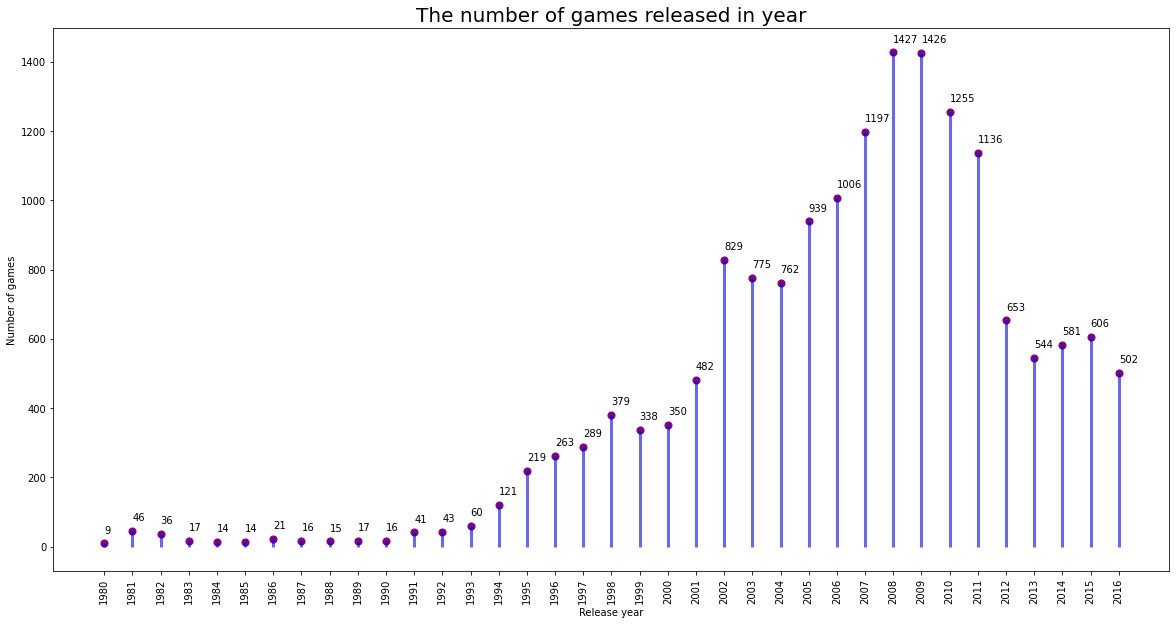

In [56]:
# Analyze the data
# 1. check how many games were released in different years and select the relevent years:
games_by_year = games_data.groupby(['year_of_release'])['name'].count().reset_index().sort_values(by=['year_of_release'])
games_by_year = games_by_year[games_by_year['year_of_release']!=0]

# display it with a plot:
fig,ax = plt.subplots(figsize=(20,10))
ax.vlines(x = games_by_year.year_of_release,ymin=0,ymax=games_by_year.name, color='blue',alpha=0.6,linewidth=3)
ax.scatter(x = games_by_year.year_of_release,y=games_by_year.name, color='purple',alpha=1,s=50)
ax.set_title('The number of games released in year',fontdict={'size':20})
ax.set_ylabel('Number of games')
ax.set_xlabel('Release year')
ax.set_xticks(games_by_year.year_of_release)
ax.set_xticklabels(games_by_year.year_of_release,rotation=90)

for row in games_by_year.itertuples():
    ax.text(row.year_of_release,row.name+30,s=round(row.name,2))

**2. Decide which years and platforms we need to predict 2017 results** 

In [57]:
# 2. lets check the platform that are still active in 2016(to predict 2017 results)
active_platforms = games_data[games_data['year_of_release']==2016]['platform'].unique()
print('active platforms in 2016:',', '.join(active_platforms))

# we will base on those platforms(we supose they will stay also in 2017) to determine the years
start_year = 0
for platform in active_platforms:
    min_year = games_data[games_data['platform']==platform]['year_of_release'].min()
    if min_year > start_year:
        start_year = min_year

print('the years we will use to predict 2017 data are:',start_year,'to',2016)

# We want to see also to set a dataset to the past year(since 2002) to check which platforms was popular in the past
analysis_data = games_data[games_data['year_of_release']>=start_year]
past_years = [x for x in range(2002,start_year)]
print(past_years)

active platforms in 2016: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii
the years we will use to predict 2017 data are: 2013 to 2016
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


**3. Check how sales varied from platform to platform - check the past and take look at the relevent data** 

Before we jump to 2013-2016 and predict what will happen in 2017. we will check the past years(2002-2012) to see which platforms used to be popular and how they fall.   

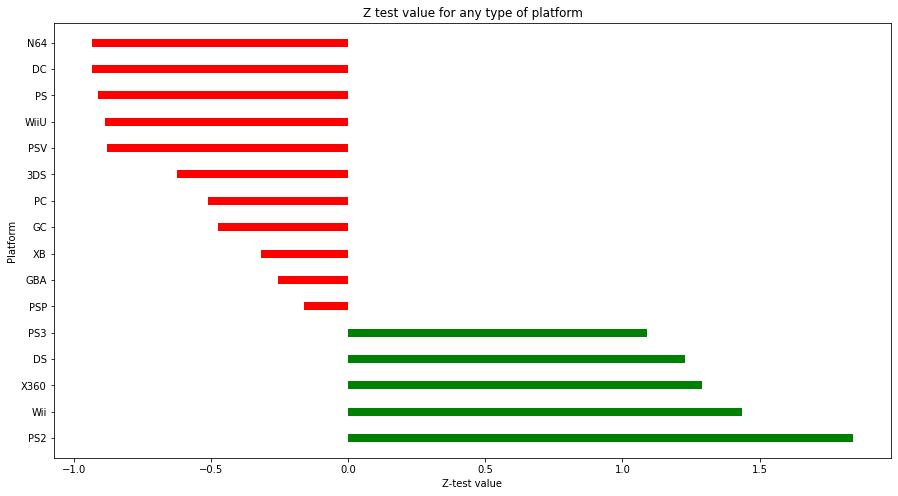

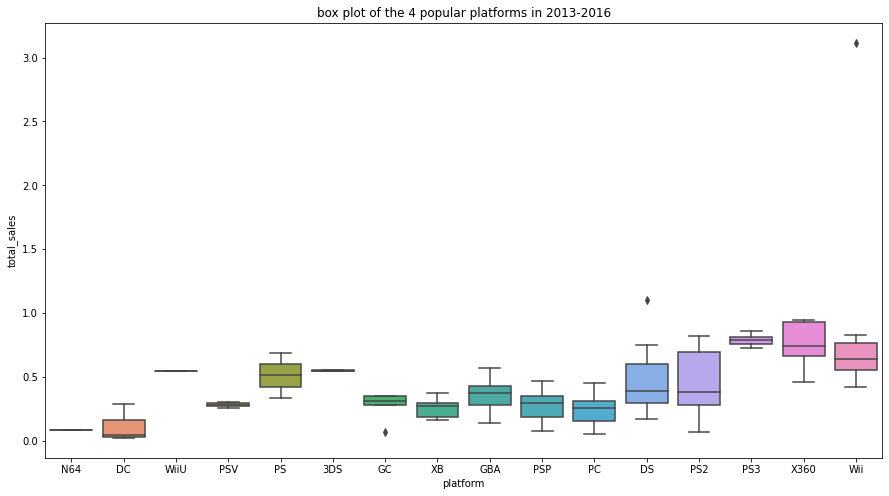

Text(0, 0.5, 'Mean sales(in milions)')

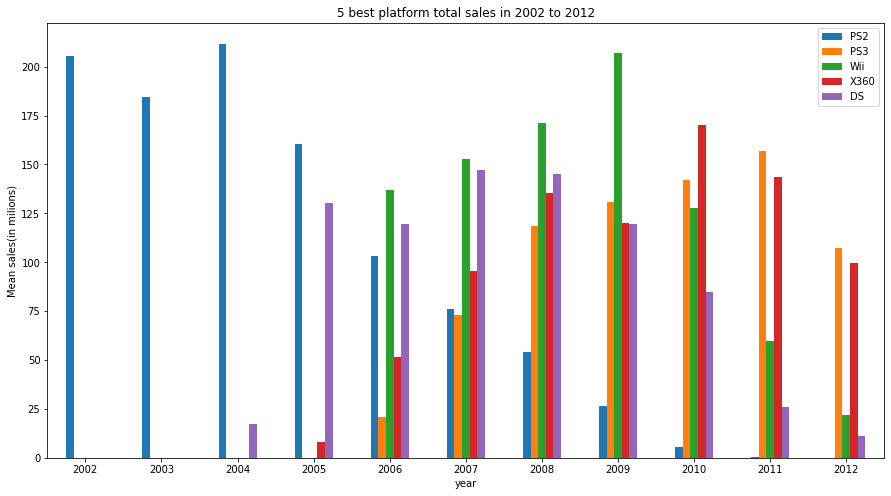

In [58]:
# 3. Check how sales varied from platform to platform. we will pick the platforms with the greatest total sales and 
#    build a distribution based on data for each year from 2013. we will see which platforms used to be popular in 
#    the past but now have zero sales.

# check the total sales for each platform:
past_data = games_data.query('year_of_release >=2002 and year_of_release <=2012')
platform_sales = past_data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales',ascending=False).reset_index()
platform_sales['sales_z'] = (platform_sales['total_sales'] - platform_sales['total_sales'].mean()) / platform_sales['total_sales'].std()
platform_sales['colors'] = ['red' if x<0 else 'green' for x in platform_sales['sales_z']]
plt.figure(figsize=(15,8))
plt.hlines(y=platform_sales.platform,xmin=0,xmax=platform_sales.sales_z,color=platform_sales.colors,linewidth=8)
plt.xlabel('Z-test value')
plt.ylabel('Platform')
plt.title("Z test value for any type of platform")

# In green we can see the platform with z test value above zero and in red below zero
# we will check only the platforms which have z test result above 1.5:
past_sucessful_platforms = platform_sales[platform_sales['sales_z']>1]['platform'].unique()

grouped1=past_data.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()
ordered=grouped1.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

# plot box plot table
plt.figure(figsize=(15,8))
sns.boxplot(x='platform',y='total_sales',data=grouped1,order=ordered).set_title('box plot of the 4 popular platforms in 2013-2016')
plt.show()

# create bar chart of the sales of the 4 best platforms during the years:
data_past = past_data.query('platform in @past_sucessful_platforms ')
grouped=data_past.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

ps3 = [0] * 11
ps2= [0] * 11
wii = [0] * 11
ds = [0] * 11
x360 = [0] * 11

for index,row in grouped.iterrows():
    index = row.year_of_release - 2002
    # Check the platform
    if row.platform == 'PS2':
        ps2[index] = row.total_sales
    if row.platform == 'PS3':
        ps3[index] = row.total_sales
    if row.platform == 'Wii':
        wii[index] = row.total_sales
    if row.platform == 'X360':
        x360[index] = row.total_sales
    if row.platform == 'DS':
        ds[index] = row.total_sales

df = pd.DataFrame()
df['PS2'] = ps2
df['PS3']= ps3
df['Wii'] = wii
df['X360'] = x360
df['DS'] = ds
df['year'] = past_years

df.set_index('year',drop =True,inplace=True)
ax = df.plot.bar(rot=0,figsize=(15,8),title='5 best platform total sales in 2002 to 2012')  
plt.ylabel("Mean sales(in milions)")
        

**4. Check platform sales during the year and determine potentially profitable platforms**

In this analysis and the next ones we will see anaylsis to predict what will happen 2017 we will relay on data from 2013 to 2016

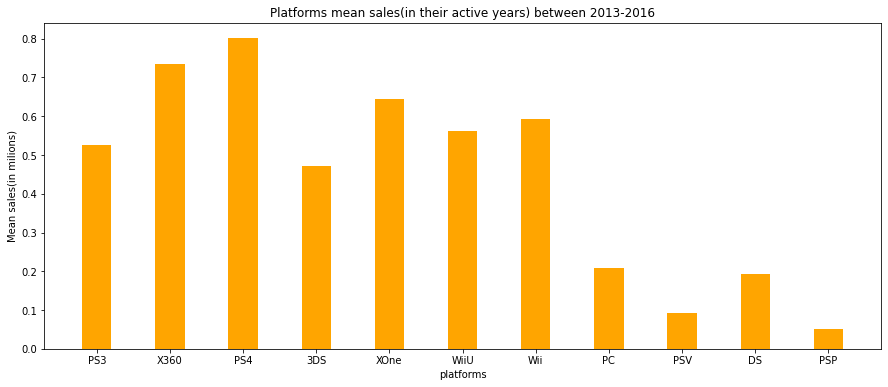

PS3 mean sales in 2016 is 41% compare to 2015.
X360 mean sales in 2016 is 34% compare to 2015.
PS4 mean sales in 2016 is 49% compare to 2015.
3DS mean sales in 2016 is 102% compare to 2015.
XOne mean sales in 2016 is 40% compare to 2015.
WiiU mean sales in 2016 is 56% compare to 2015.
Wii mean sales in 2016 is 63% compare to 2015.
PC mean sales in 2016 is 57% compare to 2015.
PSV mean sales in 2016 is 88% compare to 2015.
DS mean sales in 2016 is 0% compare to 2015.
PSP mean sales in 2016 is 0% compare to 2015.


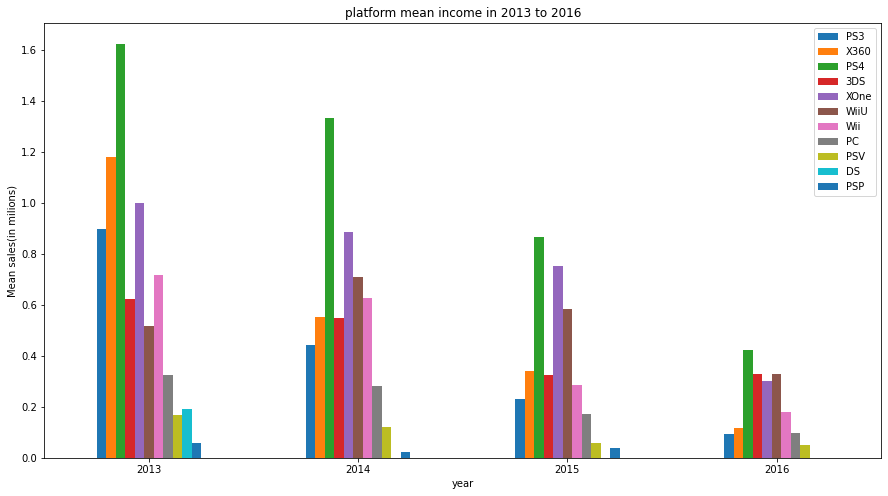

In [59]:
# 4. We will check which platforms are leading in sales,Which ones are growing or shrinking 
# and we will select several potentially profitable platforms in 2017

# plot in bar chart the mean of the total sales of the different compaines in the period: 2002-2016
unique_platforms = analysis_data['platform'].unique()
plot_platforms = []
platforms_mean_sales = []
for platform in unique_platforms:
    mean_sales = analysis_data[analysis_data['platform']==platform]['total_sales'].mean()
    plot_platforms.append(platform)
    platforms_mean_sales.append(mean_sales)

fig = plt.figure(figsize = (15,6))
 
# creating the bar plot
plt.bar(plot_platforms, platforms_mean_sales, color ='orange', width = 0.4)
 
plt.xlabel("platforms")
plt.ylabel("Mean sales(in milions)")
plt.title("Platforms mean sales(in their active years) between 2013-2016")
plt.show()

# Now lets check the platform mean total_income in 2013-2016 
df = pd.DataFrame()
for platform in unique_platforms:
    mean_sales = []
    for year in range(start_year,2017):
        year_mean_sale = analysis_data.query('year_of_release == @year and platform ==@platform')['total_sales'].mean()
        mean_sales.append(year_mean_sale)   
    df[platform] = mean_sales
# plot the bar chart     
df['year']= [x for x in range(start_year,2017)]    
df.set_index('year',drop =True,inplace=True)
ax = df.plot.bar(rot=0,figsize=(15,8),title='platform mean income in 2013 to 2016')
plt.ylabel("Mean sales(in milions)")

# Check the mean change during 2015-2016:
for platform in unique_platforms:
    mean_sale15 = analysis_data.query('year_of_release == 2015 and platform ==@platform')['total_sales'].mean()
    mean_sale16 = analysis_data.query('year_of_release == 2016 and platform ==@platform')['total_sales'].mean()
    percent = 0
    if mean_sale15 == mean_sale15 and mean_sale16 == mean_sale16:    
        percent = mean_sale16 / mean_sale15
    print(platform,'mean sales in 2016 is {:.0%}'.format(percent),"compare to 2015.")

**5. Display a box plot for the global sales of all games in 2002 to 2016** 

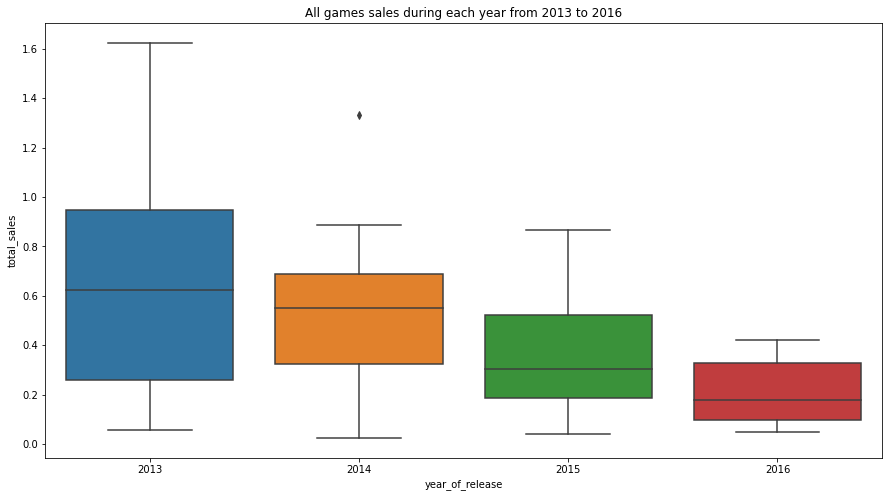

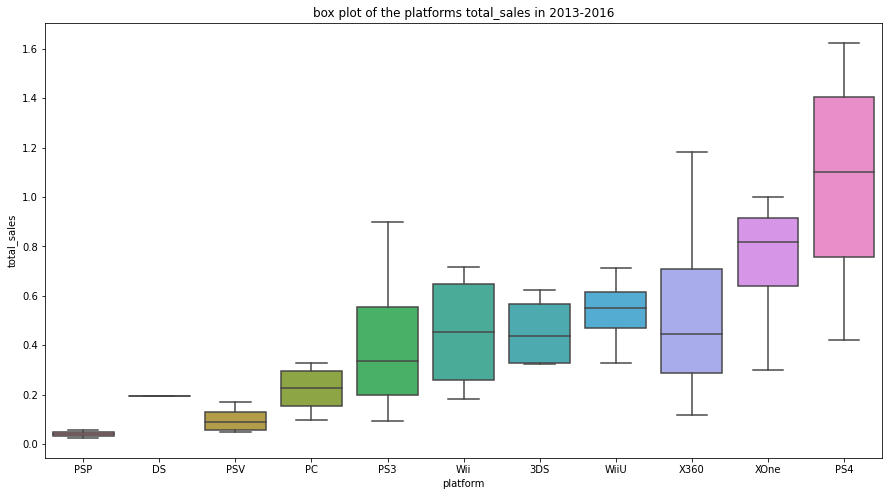

In [60]:
# 5. create boxplot of the total_income for all the game for each year(2013-2016) and for all platforms  

years_grouped=analysis_data.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index().sort_values(['year_of_release'],ascending=False)
years_ordered=years_grouped.groupby(['year_of_release'])['total_sales'].sum().reset_index()['year_of_release']

# plot box plot table
plt.figure(figsize=(15,8))
sns.boxplot(x='year_of_release',y='total_sales',data=years_grouped,order=years_ordered).set_title('All games sales during each year from 2013 to 2016')
plt.show()

platforms_grouped=analysis_data.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()
platforms_ordered=platforms_grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

# plot box plot table
plt.figure(figsize=(15,8))
sns.boxplot(x='platform',y='total_sales',data=platforms_grouped,order=platforms_ordered).set_title('box plot of the platforms total_sales in 2013-2016')
plt.show()


**6. Check out how professional reviews affect sales in the 3DS Platform**

Correlation between user_score to total_income: 0.06182271823593487.
Correlation between critic_score to total_income: 0.09947347876737328.


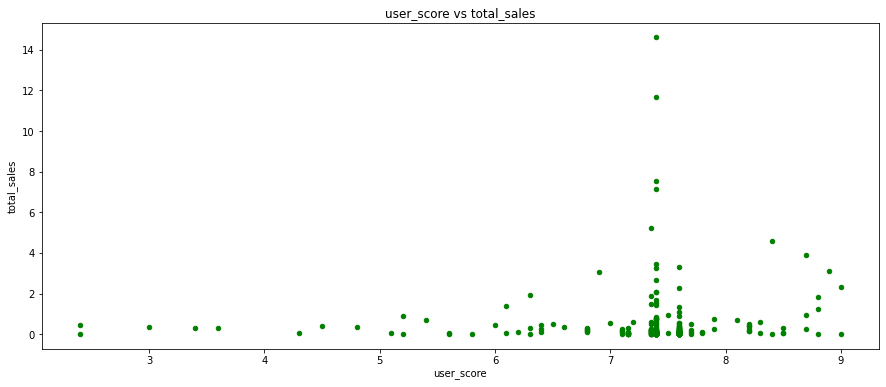

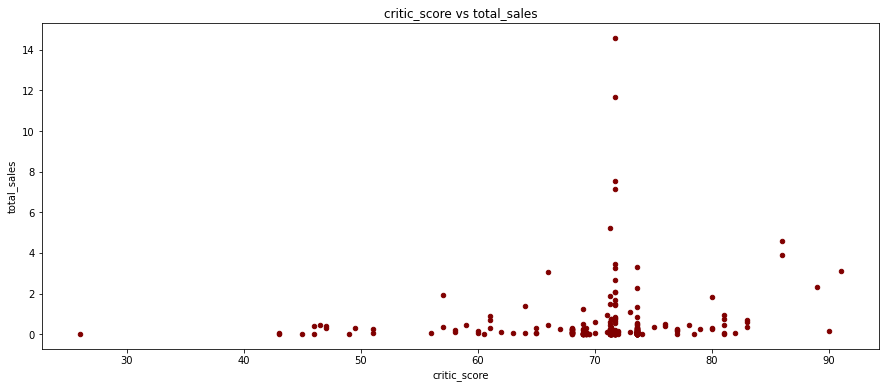

In [61]:
# 6. Check out how professional reviews affect sales in the X360 Platform
# take only the relevent data(from 3DS platform)
filter_data = analysis_data.query('platform=="3DS"').copy()

# show scatter plots how the user_score and critic_score influence the total_sales:
filter_data.plot.scatter(x='user_score',y='total_sales',title='user_score vs total_sales',color='green',figsize=(15,6));
filter_data.plot.scatter(x='critic_score',y='total_sales',title='critic_score vs total_sales',color='maroon',figsize=(15,6));

# check the correlation between the user_score and critic_score to the total_sales:
print('Correlation between user_score to total_income: {}.'.format(filter_data['total_sales'].corr(filter_data['user_score'])))
print('Correlation between critic_score to total_income: {}.'.format(filter_data['total_sales'].corr(filter_data['critic_score'])))


**7. Compare the sales of the same game on different platforms**

LEGO Marvel Super Heroes          9
FIFA 14                           9
LEGO The Hobbit                   8
Lego Batman 3: Beyond Gotham      8
The LEGO Movie Videogame          8
                                 ..
Kenka Banchou 6: Soul & Blood     1
Darkstalkers Resurrection         1
RIGS: Mechanized Combat League    1
Storm Lover 2nd                   1
Rhythm Heaven: The Best+          1
Name: name, Length: 1263, dtype: int64


Text(0, 0.5, 'Mean sales(in milions)')

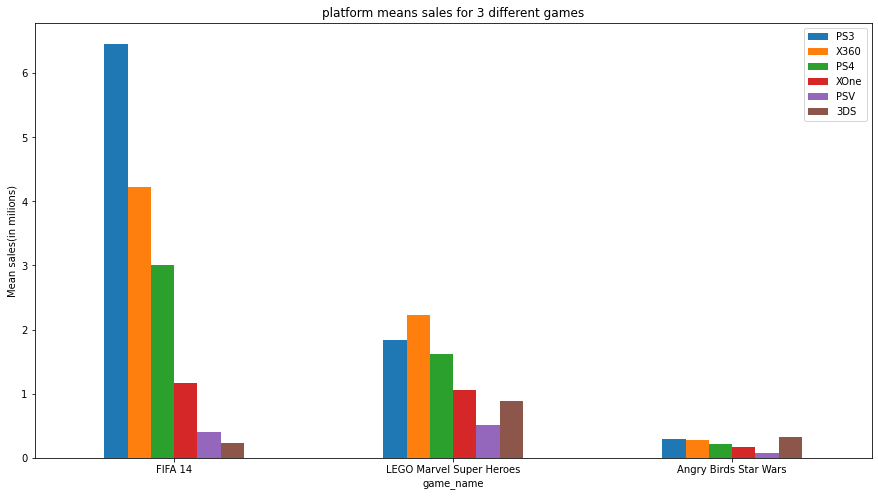

In [62]:
# 7. Compare the sales of the same game on different platforms
# functions:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3


# we will take the 3 most popular games that apears on the different platforms
games_apperance = analysis_data['name'].value_counts(ascending=False)
print(games_apperance)
games_selected =['FIFA 14','LEGO Marvel Super Heroes','Angry Birds Star Wars']
# check all the platforms that those games appears
platforms1 = list(analysis_data[analysis_data['name']==games_selected[0]]['platform'])
platforms2 = list(analysis_data[analysis_data['name']==games_selected[1]]['platform'])
platforms3 = list(analysis_data[analysis_data['name']==games_selected[2]]['platform'])
intersection1 = intersection(platforms1,platforms2)
platform_intersection = intersection(intersection1,platforms3)

# prepere df for the ploting
df = pd.DataFrame()
for platform in platform_intersection:
    mean_sales = []
    for game in games_selected:
        game_mean_sale = analysis_data.query('name== @game and platform ==@platform')['total_sales'].sum()
        mean_sales.append(game_mean_sale)   
    df[platform] = mean_sales

# plot the bar chart     
df['game_name']= [x for x in games_selected] 
df.set_index('game_name',drop =True,inplace=True)
ax = df.plot.bar(rot=0,figsize=(15,8),title='platform means sales for 3 different games')
plt.ylabel("Mean sales(in milions)")


**8. Check general distribution of games by genre**

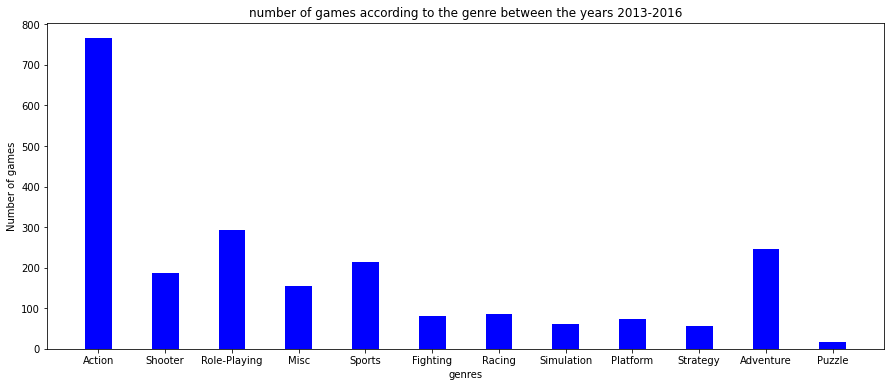

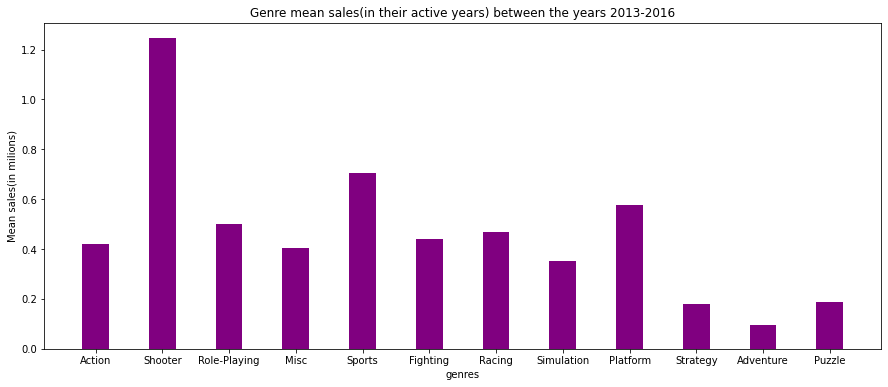

In [63]:
# 8. check general distribution of games by genre
# check unique genre in our data:
unique_generes = analysis_data['genre'].unique()

# plot in bar chart the number games of the different genres in the period: 2013-2016
generes_games = []
for genre in unique_generes:
    games = analysis_data[analysis_data['genre']==genre]['name'].count()
    generes_games.append(games)

fig = plt.figure(figsize = (15,6))
 
# creating the bar plot
plt.bar(unique_generes, generes_games, color ='blue', width = 0.4)
 
plt.xlabel("genres")
plt.ylabel("Number of games")
plt.title("number of games according to the genre between the years 2013-2016")
plt.show()


# plot in bar chart the mean of the total sales of the different genres in the period: 2002-2016
generes_mean_sales = []
for genre in unique_generes:
    mean_sales = analysis_data[analysis_data['genre']==genre]['total_sales'].mean()
    generes_mean_sales.append(mean_sales)

fig = plt.figure(figsize = (15,6))
 
# creating the bar plot
plt.bar(unique_generes, generes_mean_sales, color ='purple', width = 0.4)
 
plt.xlabel("genres")
plt.ylabel("Mean sales(in milions)")
plt.title("Genre mean sales(in their active years) between the years 2013-2016")
plt.show()



### Conclusion 

In this part we have made an analysis on the data of the years 2002 to 2016, and we use the data of the years 2013 to 2016 to predict what will happen in 2017.<br>
We did the following analysis:
1. **check how many games were released in different years and select the relevent years**<br>
    After checking our scatter plot that show how many games was released in those years we made following conclusions:
    * In the years 1980-1993 the number of games released in each year was less than 100.
    * 2002 was the first year that the number of games released was bigger than 500.
    * In 2008 was the year with the largest number of games released.
    * We have choose to analyze the data from the years of the years 2013-2016 to predict the results in 2017.

2. **Check how sales varied from platform to platform**<br>
    In this section we have started by check the mean sales of game in the past(2002-2012) of any platform and we calculate to z test for each of them to see what was the most profitable platforms over the years, we got the following findings:
    * We have choose the platform with z value of 1 or above(their mean sales are bigger than the general mean by 1 standard deviation or more). we got the following platforms: PS2, PS3, Wii, DS and X360. when PS2 have the largest mean sales.
    * The platforms that had the less sales mean over the years is: N64.
    
   After selecting the most successful platforms we check their bloxplot of the mean sales over the years and their sales on the years that had the largest number of games released: 2002-2012 <br>
   The finding from our results:
   * Wii mean sale per game in 200 was the highest and was above 3 milion when all the other mean sales was less the 1 million dolars.
   * Apart Wii that after 2006 her mean sales decreased a lot the other platforms mean sales was stable during 2006-2011.
   * PS was a really dominant platform but in 2012 he had 0 sales. his sales satrt to decreased in 2005.  

3. **Decide which years and platforms we need to predict 2017 results**<br>
    To estimate the platforms sales in 2017. we will choose all the platform that are still active on 2016. and we will take the years that all those platform was active before. we got those results:
    * Active platforms in 2016: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii 
    * Years that those platforms was active: 2013-2016

4. **Check platform sales during the year and determine potentially profitable platforms**<br>
    In this chapter we start by checking the platforms mean sales on 2013 to 2016 and we got those results:
    * PS4 had largest mean sales on 2013-2016 and X360 was right after him.
    * PSP had the smallest mean sales in this period.
    * The mean sales per game in the different platforms was around 4 milion dolars.
    
    To determine potentially profitable platforms firstly we have checked the difference between the mean sales in 2015 to 2016:
    * Except 3DS that increased a little bit their sales. all the other platform decreased the mean sales in 2016.
    * The platforms that was the most stable on the their profit on those year was 3DS and PSV. when the less stable was X360.
   
   We have also created a bar chart about the mean sales of the active platforms on 2013 to 2016. We got those results:
   * In those years the platforms that their mean sales decreased the most was PS4 and X360.
   * PSV and 3DS had the most stable mean sales.
   
   I estimate according to the mean sales value and differnces between over the years 2013-2016 that the platforms that will have the largest mean_sales in 2017 are:
   * 3DS - because of the stability of their mean sales over those years.
   * PS4, Xone, WiiU - because of their largest mean sales in 2016(almost double than the other platforms)
   
5. **Display a boxplot for the global sales of all games in 2013 to 2016**<br>
    In this step we shown two boxplots:
    * Boxplot for income of all the games on each year from 2013 to 2016 - From this boxplot we see that in 2013 the mean sales per game was the bigger and in 2016 was the smallest.
    * Boxplot for the mean sales of each active platform from 2013 to 2016 - The platforms that had the largest mean_sales are PS4(That have also the largest varience). when the platforms that had smallest mean sales are PSV and PSP when their mean sales is almost equal to zero(almost no sales) and they had the smallest varience.


6. **Check out how professional reviews affect sales in the 3DS Platform**<br>
    In this part we have checked how the user_score and critic score affect sales on x360 platforms, wegot from the scatterplot and correlation the following results:
    * In the two scatterplot we don't see a consistentency between the reviews to to the total sales so we supost there's not a strong connection between the reviews to the total sales
    * The correlation has proved what we suposed - the user score correlation to the total sales is really small- 0.07 so the user review doesn't affect the total sales in the X360 platform.<br> The correlation between the critic score to the total sales was a little bit higher ~ 0.108 but still we can't say that critic has a big affect on the the sales in the X360 platform.  

7. **Compare the sales of the same game on different platforms**<br>
    We have checked the 3 games that apear most on the different platforms on 2013-206(because the number of games that appear is huge) and we have checked his mean sales in each platform.
    We saw that on 2 games PS3 and X360 have much bigger mean sales than the other platforms.
    
8. **Check general distribution of games by genre**<br>
    In this last analysis we have checked how the genre influence the mean sales.<br>
    We did the following steps:
    * Check the number of games of each genre during 2013-2016 - The genre that have the bigger total number of games is Action(almost 3000 games). when the puzzle had the smallest total number of games(around 500 games).
    * Check the mean sales of each genre during 2013-2016 - Although that their number of games are not high the genres shooter and platform had the biggest mean sales(Over 6 milion dolars), when the adventure genre had the smallest one.  

## Create a user profile for each region 

**1. Check the top five platforms from region to region**

In [64]:
# 1. Check the top five platforms from region to region.
# Top five platform in NA:
na_pivot = analysis_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(['na_sales'],ascending=False)
print('Top five platform in NA:')
display(na_pivot.head(5))

# Top five platform in EU:
eu_pivot = analysis_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(['eu_sales'],ascending=False)
print('\n'+'Top five platform in EU:')
display(eu_pivot.head(5))

# Top five platform in JP:
jp_pivot = analysis_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(['jp_sales'],ascending=False)
print('\n'+'Top five platform in JP:')
display(jp_pivot.head(5))

Top five platform in NA:


,na_sales
platform,
PS4,108.739998
XOne,93.120003
X360,81.659996
PS3,63.500000
3DS,38.200001



Top five platform in EU:


,eu_sales
platform,
PS4,141.089996
PS3,67.809998
XOne,51.590000
X360,42.520000
3DS,30.959999



Top five platform in JP:


,jp_sales
platform,
3DS,67.809998
PS3,23.350000
PSV,18.590000
PS4,15.960000
WiiU,10.880000


**2. Check the top five genres from region to region**

In [65]:
# 2. Check the top five genres from region to region.
# Top five generes in NA:
na_pivot_genre = analysis_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(['na_sales'],ascending=False)
print('Top five genres in NA:')
display(na_pivot_genre.head(5))

# Top five generes in EU:
eu_pivot_genre = analysis_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(['eu_sales'],ascending=False)
print('\n'+'Top five genres in EU:')
display(eu_pivot_genre.head(5))

# Top five generes in JP:
jp_pivot_genre = analysis_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(['jp_sales'],ascending=False)
print('\n'+'Top five genres in JP:')
display(jp_pivot_genre.head(5))

Top five genres in NA:


,na_sales
genre,
Action,126.050003
Shooter,109.739998
Sports,65.269997
Role-Playing,46.400002
Misc,27.490000



Top five genres in EU:


,eu_sales
genre,
Action,118.129997
Shooter,87.860001
Sports,60.520000
Role-Playing,36.970001
Racing,20.190001



Top five genres in JP:


,jp_sales
genre,
Role-Playing,51.040001
Action,40.490002
Misc,9.200000
Fighting,7.650000
Shooter,6.610000


**3. Check if ESRB ratings affect sales in individual regions**

In [66]:
# 3. Check if ESRB ratings affect sales in individual regions.
# rating influence in NA:
na_pivot_esrb = analysis_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(['na_sales'],ascending=False)
print('Rating influence in NA:')
display(na_pivot_esrb)

# rating influence in EU:
eu_pivot_esrb = analysis_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(['eu_sales'],ascending=False)
print('\n'+'Rating influence in EU:')
display(eu_pivot_esrb)

# rating influence in JP:
jp_pivot_esrb = analysis_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(['jp_sales'],ascending=False)
print('\n'+'Rating influence in JP:')
display(jp_pivot_esrb)

Rating influence in NA:


,na_sales
rating,
M,184.770004
E,84.459999
T,79.089996
E10+,54.240002
AO,17.360001
EC,16.590000
RP,1.200000



Rating influence in EU:


,eu_sales
rating,
M,162.210007
E,91.720001
T,61.470001
E10+,42.689999
AO,17.180000
EC,13.990000
RP,2.970000



Rating influence in JP:


,jp_sales
rating,
T,61.759998
AO,23.410000
E,22.190001
M,14.920000
EC,10.920000
E10+,5.890000
RP,1.690000


### Conclusion

In this chapter we did this steps:
1. Check the top five platforms from region to region (In 2013 to 2016) - We got the following results:
    * In North America the 5 platform that had the most sales are: PS4, XOne, X360, PS3, 3DS
    * In Europe the 5 platform that had the most sales are: PS4, PS3, XOne, X360, 3DS
    * In Japan the 5 platform that had the most sales are: 3DS, PS3, PSV, PS4, WiiU
    
   From our results we got the following findings:
    * PS(Play Satation) platforms are really popular in all the three regions.
    * The most popular platform in North America is PS4
    * The most popular platform in Europe is PS4
    * The most popular platform in Japan is 3DS
    * In Japan the 3DS(Nintendo) platform are more popular than XOne(which in other regions is the oposite). and also the X360 that is really popular in the the other regions is not so popular in Japan. 

2. Check the top five genres from region to region (In 2013 to 2016) - We got the following results:
    * In North America the 5 genres that had the most sales are: Action, Shooter, Sports, Role-Playing, Misc.
    * In Europe the 5 genres that had the most sales are: Action, Shooter, Sports, Role-Playing, Racing.
    * In Japan the 5 genres that had the most sales are: Role-Playing, Action, Misc, Fighting, Shooter
    
   From our results we got the following findings:
    * The Action genre is really popular in all the three regions(In North America and Europe is the most popular).
    * The most popular genre in Japan is Role-Playing(In the other regions is Action).
    * In Japan the Sports and Shooter genres are less popular than Misc genre(which in other regions is the oposite). 
    * In Europe is the only region that the Misc genre is not in the top 5 genres

3. Check if ESRB ratings affect sales in individual regions - after checking the results we the following findings:
    * The E rating(Everyone) have the large affect on the sales in all the regions.
    * The T rating(Teen) have a big affect on the sales only in japan.
    * The M rating(Mature 17+) have a big affect on the sales in Europe and North america.
    
   we can conclude that the the rating affect sales almost at the same way in every region, only in japan the rating affects differently. 




## Test Hypotheses 

In [67]:
# Test hypotheses:
# 1.Average user ratings of the Xbox One and PC platforms are the same
# 2.Average user ratings for the Action and Sports genres are different

# set a critical statistical significance level for both tests:
alpha = 0.05

#______________________First test:______________________

print('____________TEST1:____________\n')
print('Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.')
print('Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are different.')

# select only xbox and pc data
df = analysis_data.dropna(subset = ["user_score"])
xbox_data = df.loc[analysis_data['platform'].str.contains('X')]
pc_data = df.loc[analysis_data['platform'].str.contains('PC')]

# check the mean before we go
xbox_mean = xbox_data['user_score'].mean()
pc_mean = pc_data['user_score'].mean()
print('Xbox mean user_rating:',xbox_mean)
print('pc total user_rating:',pc_mean)

results_test1 = st.ttest_ind(xbox_data['user_score'], pc_data['user_score'],nan_policy='omit')
print('p-value of the alternative hypothesis:', results_test1.pvalue)

if (results_test1.pvalue<alpha):
    print("We reject the null hypothesis\n")
else:
    print("We can't reject the null hypothesis\n")

# #______________________Second test:______________________

print('____________TEST2:____________\n')
print('Null hypothesis: Average user ratings for the Action and Sports genres are the same.')
print('Alternative hypothesis: Average user ratings for the Action and Sports genres are different.')
    
action_sales_mean = df[df['genre']=='Action']['user_score'].mean()
sports_sales_mean = df[df['genre']=='Sports']['user_score'].mean()
print('Action genre games mean user_score:',action_sales_mean)
print('Sports genre games mean user_score:',sports_sales_mean)

results_test2 = st.ttest_ind(df[df['genre']=='Action']['user_score'], df[df['genre']=='Sports']['user_score'], nan_policy='omit', equal_var=False)
print('p-value of the alternative hypothesis:', results_test2.pvalue)

if (results_test2.pvalue<alpha):
    print("We reject the null hypothesis\n")
else:
    print("We can't reject the null hypothesis\n")
    

____________TEST1:____________

Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are different.
Xbox mean user_rating: 6.505522
pc total user_rating: 6.4639945
p-value of the alternative hypothesis: 0.753261688415556
We can't reject the null hypothesis

____________TEST2:____________

Null hypothesis: Average user ratings for the Action and Sports genres are the same.
Alternative hypothesis: Average user ratings for the Action and Sports genres are different.
Action genre games mean user_score: 7.1997576
Sports genre games mean user_score: 5.6738806
p-value of the alternative hypothesis: 2.1059037853187464e-24
We reject the null hypothesis



### Conclusion 

We have checked 2 test hypotheses, we set a critical statistical significance level for both tests $\alpha = 0.05$ for make sure that this really happen(that anomalies in data will not give us false results):
1. The Average user ratings of the Xbox One and PC platforms are the same

   We formulated the test in this way:
   * Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
   * Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are different.
   
   We have calculated the p-value and get: $p = 0.75 $. the p_value is much bigger $\alpha = 0.05$ so we can't reject the null hypothesis. So the average user ratings of the Xbox One and PC platforms are the same.
    
2. Average user ratings for the Action and Sports genres are different
    
    We formulated the test in this way:
   * Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
   * Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are different.

   We have calculated the p-value and get a really small one that is under the p_value $\alpha = 0.05$ so we reject the null hypothesis. So the average user ratings for the Action and Sports genres are different(because we reject the the hypothesis they are the same).


## Overall Conclusion 

**Summary**

In the project we did the following steps:
* Read the dataset and check his general information
* Data Preprocessing - Prepare the dataset to the analysis 
* Analyze the data 
* Create a user profile for each region 
* Test 2 hypotheses

After we did all the steps lets all conclusions we had in the 2 frist steps:
* There's no duplicated rows in our data
* Theres a high correlation between the user score to the critic score and the platform kind and the rating really influence them too.
* cast variables can help us in future analysis and downcast help us save unused bits.

From our analysis we can make the following conclusions(Most of them are for the years 2002 to 2016):
* 2002 to 2016 are the main data because before 2002 the number of games released in every year is less than 500 and in the years 1980-1993 the number of games released in each year was less than 100.
* 2008 was the year with the largest number of games released.
* PS2 is the platform with the largest mean sales all over the years.
* the mean sale per game in 2006 was the highest of all times and was above 3 milion dolars.
* our estimation the 4 most popular platform in 2017 will be: 3DS, PS4, Xone and WiiU. 
* The professional reviews does not affect sales in the X360 Platform.
* The most frequent genre game is Action but the shooter genre had the biggest mean sales.

We have also compare between regions and got the following conclusions:
* Playstation platforms are popular in all regions
* The popular platforms in Japan is diffrence since Nintendo platforms are more popular there.
* The Action genre is really popular in all regions.
* games with E and M have influence on rating  sales.
* Japan's users most of the cases prefer other genres and platforms than North America and Europe users that have similer prefrences.

From our test hypothses we can conclude that:
* The Average user ratings of the Xbox One and PC platforms are different.
* The average user ratings for the Action and Sports genres are the same.

***What we learn form our data?***

* The genre of games that was the most sucessful in 2013-2016 and most probably will be also the most popular in 2017 are: Action, Shooter and Role-Playing.
* PS4, X360 was a really popular platforms but in the years 2013-2016 their sales decreased drastly so invest or buy this console is not a good choice. a better idea is to invest on more stable platform like 3DS.
* If you plan to relase a game choose wiely also the profit of the genre. The genre Shooter is the ideal because the mean sale per game on this genre is much higher from the other genres.
* The region matters espeically if you want that a game will sucsses in Japan that have different trends from the other regions.
* In North America and Europe the games with ESRB rating: M(Mature - above 17) are the most popular so we can infer that invest on games for matures and not for younger ages. In Japan is better to invest on games that are intended for teens.   
* Invest on new platform! the platforms like X360 is about to extinct so is better to invest on new platforms like Xone for example.
* When you custumize a game for users from North America good chance that he will also be custumed for Europe and vice versa.


**Thanks for view my project 🙂**